In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Линейная регрессия
## Краткое повторение

Закон, по которому распределены данные: $ Y=f(X)+\epsilon $  
Закон, который мы моделируем: $ f_w(x)=w_0+\sum_{i=1}^p w_i x_i $  

"Спрячем" свободный член внутрь икса (добавим туда элемент единицу). И перепишем модель в самом просто виде: $y = \langle w, x \rangle$  
Тогда в итоге получаем модель, которая в идеале считаетм какие-то игреки с крышечкой, которые максимально близки к истинным игрекам: $$ f_w(X)=X w=\widehat{Y} \approx Y $$

Мы знаем матриксу $X$ (матрица признаков, features). И знаем вектор $y$. И хотим найти вектор весов (коэффициентов) $w$.  
Тогда сформулируем задачу оптимизации следующим образов: $$
Q(X)=\sum_{i=1}^n L\left(y^i, f_w\left(x^i\right)\right) \rightarrow \min _w
$$,
где $L$ -- это некотора функция (лосс, функция потерь). 

Если в качестве функции потерь взять MSE (среднеквадратичную ошибку), то перепишем постановку задачи как $$
\begin{aligned}
L(y_{pred}, Y) &= \frac{1}{n}||y_{pred} - Y||^2_2 =\\
&= \frac{1}{n}||Xw - Y||^2_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 =: L(w)
\end{aligned}
$$

В такой постановке с некоторыми допущениями наша задача имеет аналитическое решение и оно оптимально.  
Минимизация ошибки по методу наименьших квадратов дает решение: $$ w = (X^TX)^{-1}X^TY $$

### Мультиколлинеарность
Мы боимся линейной зависимости наших признаков, потому что из-за этого мы можем получить несостоятельную модель.  
Помимо простого удаления сильно скоррелированных столбцов мы также можем добавить регуляризацию в нашу модель, т.е. штраф за веса (за коэффициенты):
* $L_2(w) = ||Xw - Y||^2_2 + \lambda||w||^2_2$, или Ridge
* $L_1(w) = ||Xw - Y||^2_2 + \lambda||w||_1$, или Lasso
* $L_{EN}(w) = ||Xw - Y||^2_2 +  \lambda_1||w||_1  + \lambda_2||w||^2_2$, или Elastin Net

**В чём проблема аналитического решения?**
> - Оно работает для задачи только в такой постановке -- с такой функцией потерь и желательно полноранговой матрицей $X$;  
> - Мат.ожидание ошибки (выборочное среднее) равно нулю;  
> - Гомоскедастичность (постоянство дисперсии на протяжении данных).

## Градиентный спуск
Рассмотрим некоторую среднеквадратичную функцию потерь $L(w)$  
*(т.е. не функцию зависимости целевоей переменной от признаков $f_w(X)$, а функцию зависимости потерь от выбранного вектора весов омега).


Мы хотим найти минимум этой функции, то есть такую точку в пространстве весов, которая соответствует минимальному значению функции потерь (иными словами, хотим найти веса, при которых потери минимальны).  

"Обрежем" задачу до функции одной переменной $ y = wx $. Тогда функция потерь зависим от одной омеги, т.е. это функция от одной переменной. А с таком умеют работать даже школьники:

1. Находим производную функции;   
2. Приравниваем производную к нулю; 
3. Так мы нашли все точки экстремума. Определим, кто из них минимумы. Определим глобальный. Готово.

Возьмём исходную модель $y = wx $.  
Тогда функция потерь сводится к $$ L(w) = \frac{1}{n}\sum_{i=1}^{n}\left(x_iw - y_i\right)^2 $$

Допустим, что данные порождены законом $ y = 3x$

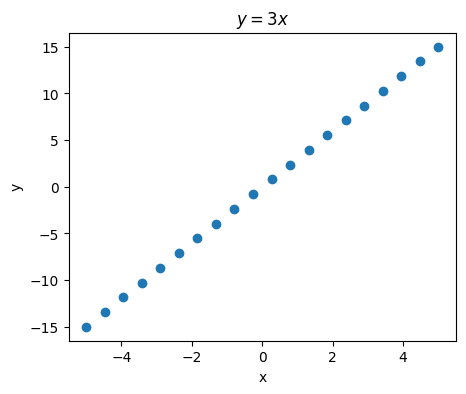

In [2]:
# сгенерируем выборку
x = np.linspace(-5, 5, 20) 
y = 3*x # w = 3

# построим график
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')
plt.title('$ y = 3x$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Получим значение для функции потерь для различных значений омега 
# (как если бы не знали истинного значения омега)

w = 2 # попробуем для одного значения посчитать функцию потерь
loss = np.power(x * w - y, 2).sum() / x.shape[0]
print(loss)

9.210526315789474


In [6]:
# построим значение функции потерь для промежутка от 0 до 5 с шагов 0.1
w = np.linspace(0, 5, 51)
w

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [7]:
x

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [8]:
print((x * w.reshape(-1, 1)).shape)
x * w.reshape(-1, 1)

(51, 20)


array([[ -0.        ,  -0.        ,  -0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -0.5       ,  -0.44736842,  -0.39473684, ...,   0.39473684,
          0.44736842,   0.5       ],
       [ -1.        ,  -0.89473684,  -0.78947368, ...,   0.78947368,
          0.89473684,   1.        ],
       ...,
       [-24.        , -21.47368421, -18.94736842, ...,  18.94736842,
         21.47368421,  24.        ],
       [-24.5       , -21.92105263, -19.34210526, ...,  19.34210526,
         21.92105263,  24.5       ],
       [-25.        , -22.36842105, -19.73684211, ...,  19.73684211,
         22.36842105,  25.        ]])

In [9]:
y

array([-15.        , -13.42105263, -11.84210526, -10.26315789,
        -8.68421053,  -7.10526316,  -5.52631579,  -3.94736842,
        -2.36842105,  -0.78947368,   0.78947368,   2.36842105,
         3.94736842,   5.52631579,   7.10526316,   8.68421053,
        10.26315789,  11.84210526,  13.42105263,  15.        ])

In [10]:
x.shape[0]

20

In [11]:
loss = (np.power((x * w.reshape(-1, 1)) - y, 2) / x.shape[0]).sum(axis=1)
loss

array([82.89473684, 77.46052632, 72.21052632, 67.14473684, 62.26315789,
       57.56578947, 53.05263158, 48.72368421, 44.57894737, 40.61842105,
       36.84210526, 33.25      , 29.84210526, 26.61842105, 23.57894737,
       20.72368421, 18.05263158, 15.56578947, 13.26315789, 11.14473684,
        9.21052632,  7.46052632,  5.89473684,  4.51315789,  3.31578947,
        2.30263158,  1.47368421,  0.82894737,  0.36842105,  0.09210526,
        0.        ,  0.09210526,  0.36842105,  0.82894737,  1.47368421,
        2.30263158,  3.31578947,  4.51315789,  5.89473684,  7.46052632,
        9.21052632, 11.14473684, 13.26315789, 15.56578947, 18.05263158,
       20.72368421, 23.57894737, 26.61842105, 29.84210526, 33.25      ,
       36.84210526])

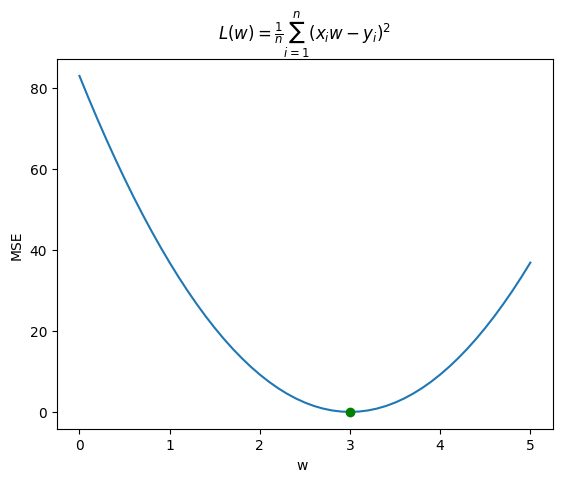

In [12]:
# нарисуем 
plt.plot(w, loss)
plt.title(r'$L(w) = \frac{1}{n}\sum_{i=1}^{n}\left(x_iw - y_i\right)^2$')
plt.ylabel('MSE')
plt.xlabel("w ")
plt.plot(3, 0, 'og') 

plt.show()

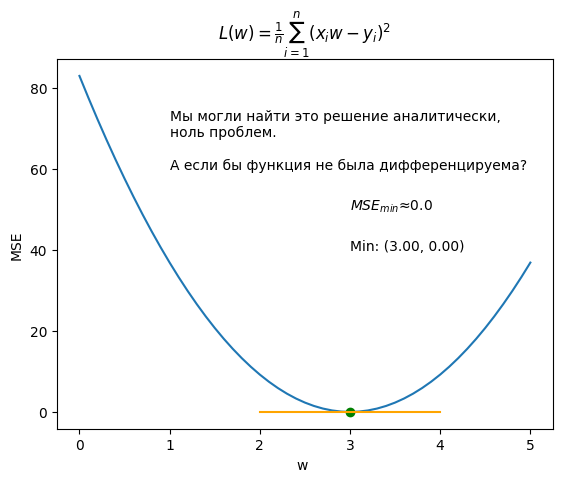

In [13]:
# нарисуем 
plt.plot(w, loss)
plt.title(r'$L(w) = \frac{1}{n}\sum_{i=1}^{n}\left(x_iw - y_i\right)^2$')
plt.ylabel('MSE')
plt.xlabel("w ")
plt.plot(3, 0, 'og') 
plt.plot([2,4], [0,0], color='orange')
plt.text(1, 60, 'Мы могли найти это решение аналитически, \nноль проблем.\n\nА если бы функция не была дифференцируема?')
plt.text(3, 50, '$MSE_{min} ≈ $' + str(round(loss.min(), 2)))
plt.text(3, 40, f'Min: ({w[np.argmin(loss)]:.2f}, {loss.min():.2f})')

plt.show()

Добавим шума, чтобы посмотреть, как изменится график функции потерь.

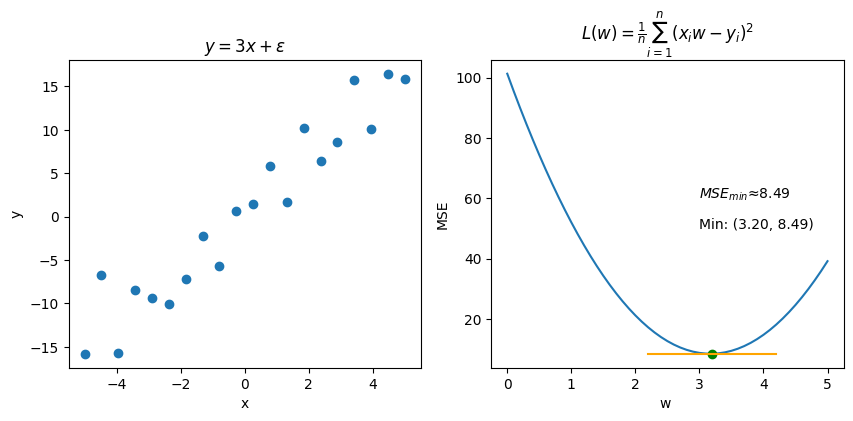

In [15]:
# сгенерируем выборку
x = np.linspace(-5, 5, 20) 
y = 3*x + np.random.normal(0, 2.5, 20)

# построим график
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.title('$ y = 3x + \epsilon$')
plt.xlabel('x')
plt.ylabel('y')

loss = (np.power((x * w.reshape(-1, 1)) - y, 2) / x.shape[0]).sum(axis=1)

plt.subplot(1, 2, 2)
plt.plot(w, loss)
plt.title(r'$L(w) = \frac{1}{n}\sum_{i=1}^{n}\left(x_iw - y_i\right)^2$')
plt.ylabel('MSE')
plt.xlabel("w ")
plt.plot(w[np.argmin(loss)], loss.min(), 'og') 
plt.plot([w[np.argmin(loss)]-1,w[np.argmin(loss)]+1], [loss.min()] * 2, color='orange')
plt.text(3, 60, '$MSE_{min} ≈ $' + str(round(loss.min(), 2)))
plt.text(3, 50, f'Min: ({w[np.argmin(loss)]:.2f}, {loss.min():.2f})')


plt.show()

Зачастую уравнение $f'(x) = 0$ не имеет решений, например для $f(x) = x^6 + 2x^5 + 3x^2 + 4$. 

## Найдем минимум с помощью градиентного спуска.
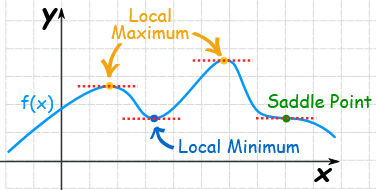

Положим случайно куда-нибудь "мячик", далее он скатится в минимум.  
А если мячик мы положили в простанство весов для MSE, то задача выпукла и минимум там один. Ура!

Формальнее напишем так:
1. Инициализируем случайные веса, т.е. положим мячик в случайное место в нашем омега-пространстве. Назовём эту точку $w_1$;
2. Найдем следующее положение мячика как $ w_2 = w_1 - lr\cdot f'(w_1) $, где lr (learning rate) -- размер шага, который мы делаем в направлении, обратном от направления роста функции (мы же хотим в минимум);  
3. Будем повторять "шаги" в виде $w_{n+1} = w_n - lr\cdot f'(w_n)$ до какого-то момента   
(например, пока не сделаем 100 шагов, или пока $f'(w_n)$ не станет очень маленьким.  

Для функции многих переменных мы используем градиент, то есть вектор из частных производных.  
Он указывает направление роста функции.

#### Недостатки:
- Зависит от выбранного $lr$;
- Долго катится по плато при фиксированном $lr$;

<img src='https://miro.medium.com/max/1400/1*7VyTVnlVj2Ooqa3MRSRFEQ.gif' />

#### Справа изображён график только для угла наклона, хотя оптимизируем и угол, и свободный член
![](https://baptiste-monpezat.github.io/6f5cc892ec345d96f64c881b62b0d910/gradient_descent_parameter_a.gif)

#### Модификации градиентного спуска


![Mod](https://static.wixstatic.com/media/3eee0b_33163162ddd94900b7d9f5b049e9b7e3~mv2.gif 'Mod')

#### Стохастический градиентный спуск: дешёво и сердито!  

Алгоритм:  
1. Перемешиваем записи (то есть векторы-строки с признаками);  
2. Считаем градиент по одному образцу;  
3. Делаем шаг;  
4. Повторяем пункт. 2 следующей записи;  
5. Делаем шаг;
6. Когда пройдемся по всем записям, то опять перемешаем, и будем повторять пункты 2,3;  
7. И так пока не сойдемся...  

Т.е. различие от обычного градиентного спуска (BATCH GRADIENT DESCENT) мы считаем градиент не по всем записям, а по одному, каждый раз делая шаг.  

Компромисс -- mini-batch gradient descent, когда мы считаем градиент по группам записей, но не по всем.

## Кросс-валидация

Мы не должны видеть тестовый датасет до самого конца, но хотим найти оптимальные гиперпараметры модели. Для этого мы используем валидационный датасет. Вылезают две проблемы:  
1. Мы должны выделить некоторое количество данных для валидационной выборки, т.е. мы теряем данные для обучения;  
2. В валидационный датасет могут попасть "хорошие" данные, на которых наша модель себя проявит хорошо, но если бы попали другие данные, то модель могла бы работать хуже. Иными словами, нам может случайно повезти и мы получим маленький лосс, хотя гиперпараметры всё ещё неоптимальны.

*Кросс-валидация*:
- Разобьем данные для обучения на несколько частей (folds);
- Для каждого из фолдов проделаем следующее: обучимся на оставшихся фолдах, а на текущем фолде провалидируемся;
- Если мы разбили обучающую выборку на k фолдов, то получим k метрик. Будем использовать их среднее, например.  
- А далее поменяем гиперпараметры и проведём валидацию заново;  
- Так будем делать до тех пор, пока не убедимся, что отобрали оптимальные значения. 
- **И только потом проверимся на тесте!**

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width=50% />

## Практика

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Описание датасета для работы:

    Species: Species name of fish
    Weight: Weight of fish in gram
    Length1: Vertical length in cm
    Length2: Diagonal length in cm
    Length3: Cross length in cm
    Height: Height in cm
    Width: Diagonal width in cm

Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'. 

$ Weight = w_0 + w_1 * Length1 + w_2 * Length2 + w_3 * Length3 + w_4 * Height + w_5 * Width$

In [25]:
df = pd.read_csv('./Data/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [112]:
df.Weight.std()

357.9783165508931

In [43]:
y = df['Weight']
num_cols = ['Length1', 'Length2', 'Length3', 'Height', 	'Width'] 
cat_cols = ['Species']
X = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], drop_first=True).astype(np.int8)], axis=1)

In [44]:
X.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [45]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25052024, test_size=0.2)

In [49]:
X_train.shape, X_test.shape

((127, 11), (32, 11))

## с регуляризацией

#### GridSearchCV + SGDRegressor

In [89]:
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_error',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD.

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of

In [101]:
params = {
    'alpha': [0, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000],
    'learning_rate': ['constant', 'adaptive', 'invascaling'],
    'eta0': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
}

In [102]:
from sklearn.metrics import make_scorer

In [103]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [104]:
model = GridSearchCV(SGDRegressor(), param_grid=params, scoring=scorer,  n_jobs=5, verbose=1, cv=4)

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
%%time
model.fit(X_train, y_train)

Fitting 4 folds for each of 756 candidates, totalling 3024 fits
CPU times: total: 1.55 s
Wall time: 3.66 s


GridSearchCV(cv=4, estimator=SGDRegressor(), n_jobs=5,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10],
                         'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'learning_rate': ['constant', 'adaptive',
                                           'invascaling'],
                         'max_iter': [100, 1000], 'penalty': ['l1', 'l2']},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [107]:
model.best_estimator_

SGDRegressor(alpha=0.5, eta0=1e-05, learning_rate='constant', max_iter=100,
             penalty='l1')

In [108]:
model.best_params_

{'alpha': 0.5,
 'eta0': 1e-05,
 'learning_rate': 'constant',
 'max_iter': 100,
 'penalty': 'l1'}

In [109]:
model.best_score_

-49677.50288574626

In [110]:
y_pred = model.best_estimator_.predict(X_test)
(mean_squared_error(y_test, y_pred) ** 0.5).round(2)

186.9

In [113]:
r2_score(y_test, y_pred)

0.5753706325900574

##  pipeline

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [155]:
pipeline = Pipeline([('scale', StandardScaler()), ('model', Ridge())])
pipeline

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge())])

In [156]:
params = {'model__alpha': [0, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10],
          'scale__with_std': [True, False],
          'scale__with_mean': [True, False]}

scorer = make_scorer(mean_squared_error, greater_is_better=False )

model = GridSearchCV(pipeline, param_grid=params, scoring=scorer, verbose=0, n_jobs=2)
model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=2,
             param_grid={'model__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1,
                                          5, 10],
                         'scale__with_mean': [True, False],
                         'scale__with_std': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [157]:
model.best_params_

{'model__alpha': 0.01, 'scale__with_mean': False, 'scale__with_std': True}

In [158]:
y_pred = model.best_estimator_.predict(X_test)
(mean_squared_error(y_test, y_pred) ** 0.5).round(2)

70.89

In [159]:
r2_score(y_test, y_pred)

0.9389011564508271

In [160]:
pipeline = Pipeline([('scale', StandardScaler()), ('model', SGDRegressor())])
params = {
    'model__alpha': [0, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10],
    'model__penalty': ['l1', 'l2'],
    'model__max_iter': [100, 1000],
    'model__learning_rate': ['constant', 'adaptive', 'invascaling'],
    'model__eta0': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
    'scale__with_std': [True, False],
    'scale__with_mean': [True, False]
}

scorer = make_scorer(mean_squared_error, greater_is_better=False )

model = GridSearchCV(pipeline, param_grid=params, scoring='neg_mean_squared_error', verbose=0, n_jobs=6)
model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SGDRegressor())]),
             n_jobs=6,
             param_grid={'model__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1,
                                          5, 10],
                         'model__eta0': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                         1e-06],
                         'model__learning_rate': ['constant', 'adaptive',
                                                  'invascaling'],
                         'model__max_iter': [100, 1000],
                         'model__penalty': ['l1', 'l2'],
                         'scale__with_mean': [True, False],
                         'scale__with_std': [True, False]},
             scoring='neg_mean_squared_error')

In [161]:
model.best_params_

{'model__alpha': 0.01,
 'model__eta0': 0.01,
 'model__learning_rate': 'constant',
 'model__max_iter': 1000,
 'model__penalty': 'l2',
 'scale__with_mean': True,
 'scale__with_std': True}

In [162]:
y_pred = model.best_estimator_.predict(X_test)
(mean_squared_error(y_test, y_pred) ** 0.5).round(2)

87.06

In [163]:
r2_score(y_test, y_pred)

0.9078675289013532